[[0.01 0.14 0.31 0.53 1.13 2.04 2.25 2.41 2.57 2.73 2.97]
 [0.   0.01 0.11 0.28 0.77 1.68 1.86 1.99 2.12 2.26 2.5 ]
 [0.   0.   0.02 0.13 0.56 1.43 1.59 1.72 1.85 1.99 2.23]
 [0.   0.   0.   0.02 0.38 1.18 1.34 1.47 1.6  1.74 1.98]
 [0.   0.   0.   0.   0.02 0.5  0.66 0.79 0.92 1.06 1.3 ]
 [0.   0.   0.   0.   0.   0.03 0.14 0.24 0.34 0.45 0.64]
 [0.   0.   0.   0.   0.   0.   0.03 0.1  0.18 0.28 0.45]
 [0.   0.   0.   0.   0.   0.   0.   0.01 0.06 0.14 0.28]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.06 0.18]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.1 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03]]
[[0 0 0 1 3 3 3 3 3 4 4]
 [0 0 1 2 3 3 4 4 4 4 4]
 [0 0 0 2 3 4 4 4 4 4 4]
 [0 0 0 0 3 4 4 4 4 4 4]
 [0 0 0 0 0 4 4 4 4 4 4]
 [0 0 0 0 0 0 5 5 6 6 6]
 [0 0 0 0 0 0 0 6 6 7 7]
 [0 0 0 0 0 0 0 0 7 7 8]
 [0 0 0 0 0 0 0 0 0 8 9]
 [0 0 0 0 0 0 0 0 0 0 9]
 [0 0 0 0 0 0 0 0 0 0 0]]
[[0.01 0.12 0.19 0.26 0.58 1.01 1.06 1.09 1.12 1.15 1.2 ]
 [0.   0.01 0.08 0.15 0.47 

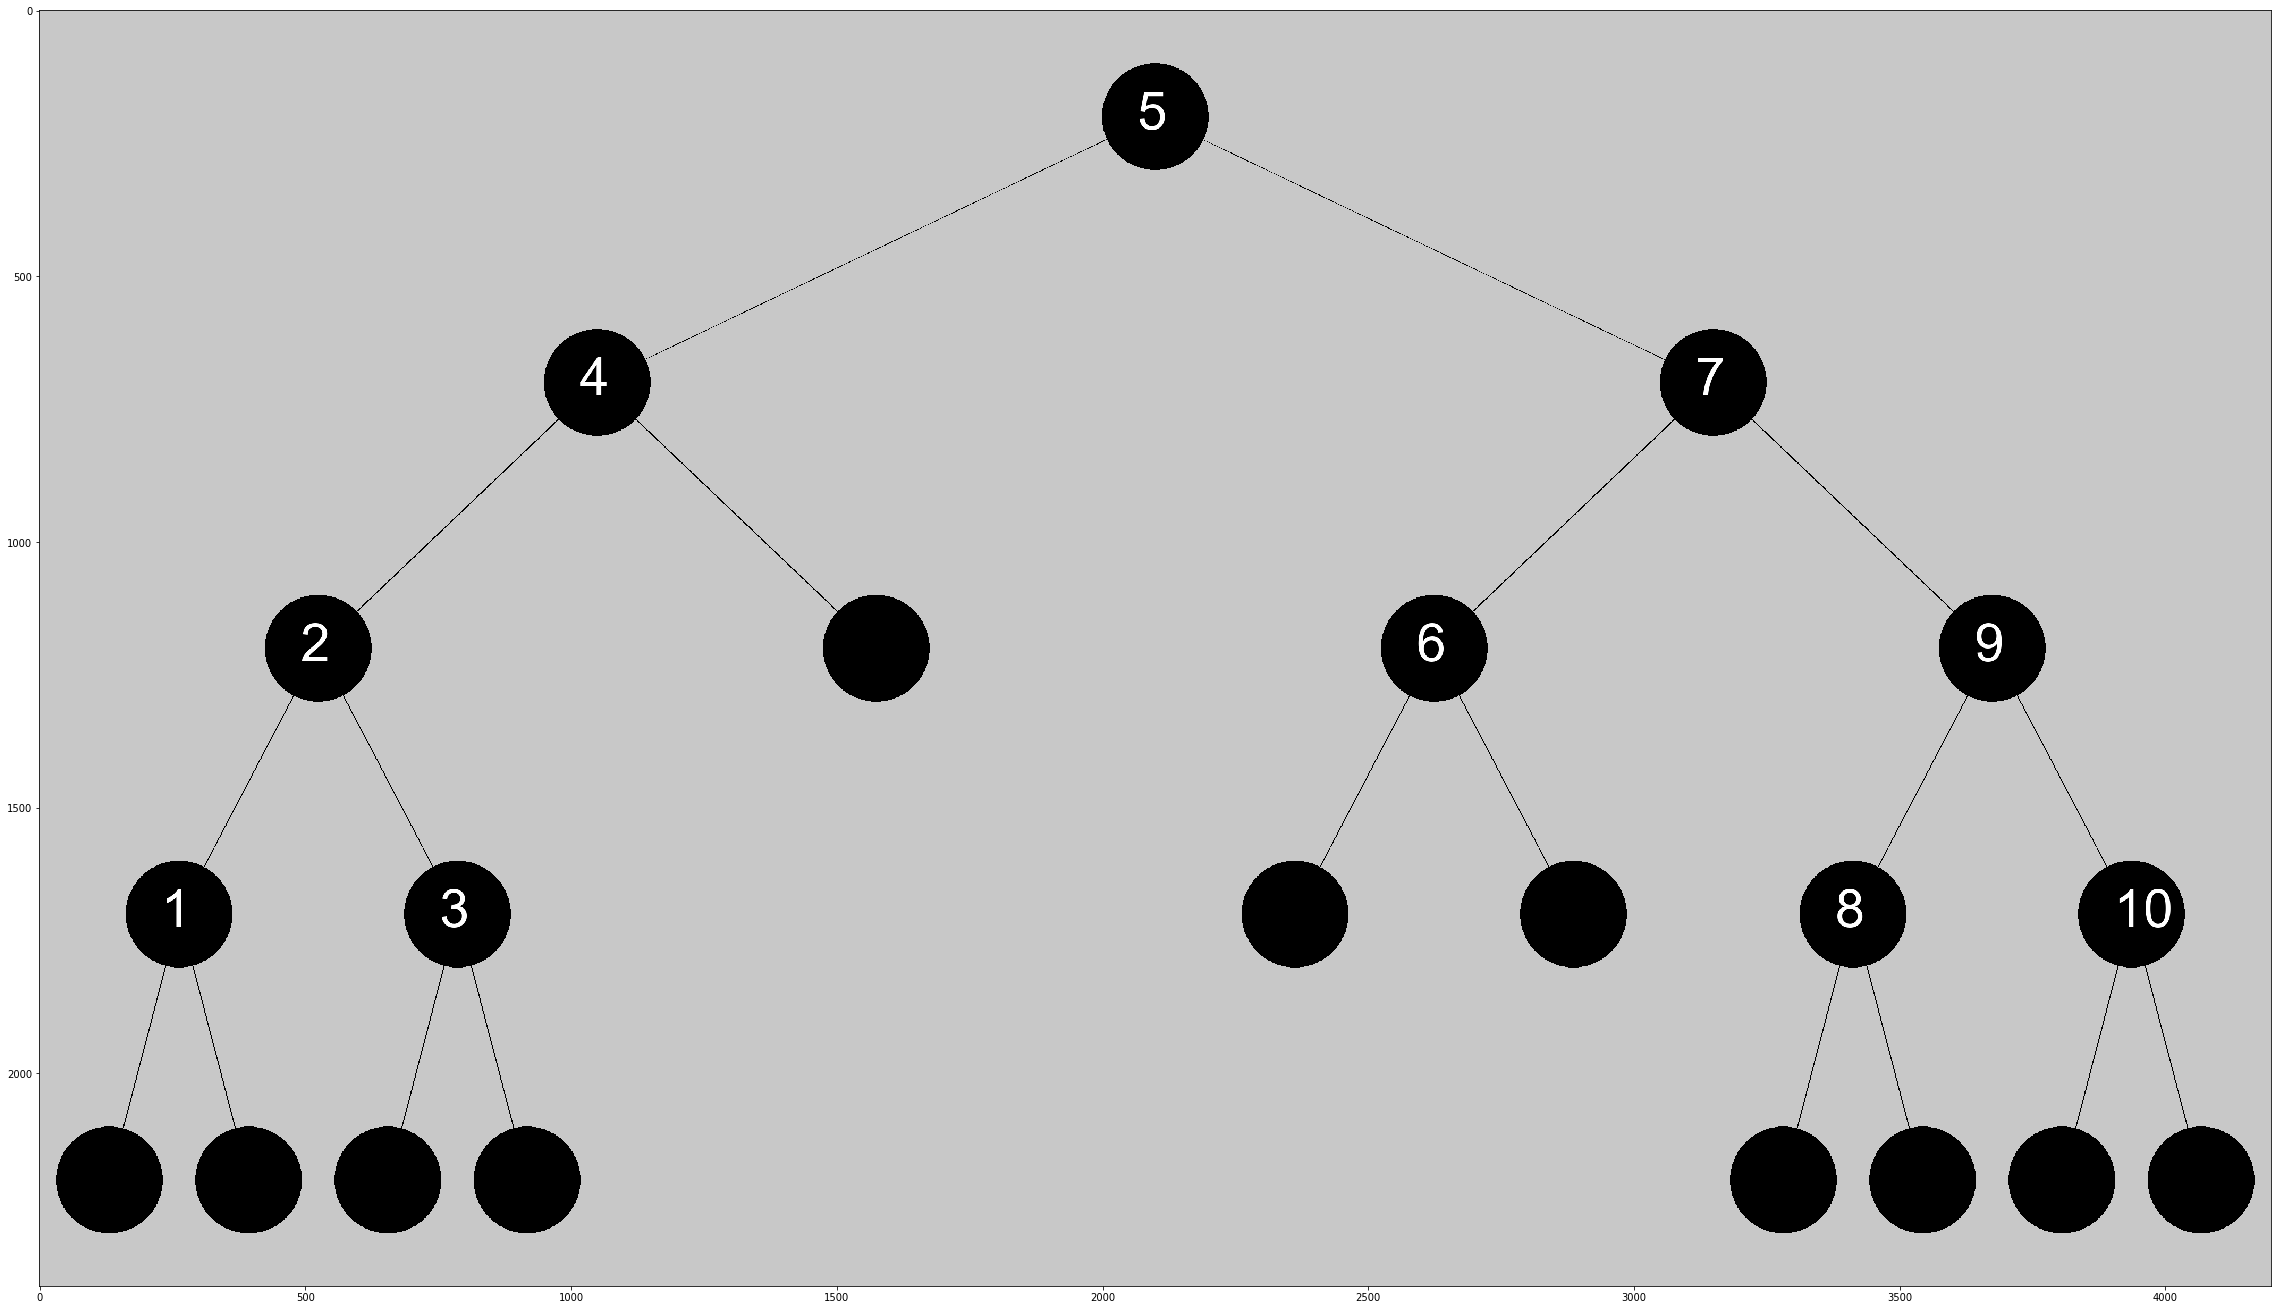

In [6]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum

Colour = Enum('Colour', 'BLACK RED')


class Node:
    def __init__(self,data):
        self.parent = None
        self.left = None
        self.right = None
        self.data = data
        self.colour = Colour.BLACK
        
        
    def DrawNode(self,r,sizeX,sizeY,img,d,f,currentLevel,currentX,currentY):
        
        if self.left:
            d.line([(currentX, currentY) , (currentX - sizeX//(2**currentLevel),currentY + 5 * r)], width = 2, fill=(0,0,0))
            self.left.DrawNode(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX - sizeX//(2**currentLevel),currentY + 5 * r)
        if self.right:
            d.line([(currentX, currentY) , (currentX + sizeX//(2**currentLevel),currentY + 5 * r)], width = 2, fill=(0,0,0))
            self.right.DrawNode(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX + sizeX//(2**currentLevel),currentY + 5 * r)
            
        if self.colour == Colour.BLACK:
            d.ellipse([(currentX - r, currentY - r),(currentX + r,currentY + r)], outline = (0,0,0),fill = (0,0,0), width = 1)
        else:
            d.ellipse([(currentX - r, currentY - r),(currentX + r,currentY + r)], outline = (255,0,0),fill = (255,0,0), width = 1)
            
        if self.data:
            d.text((currentX-r//3,currentY-2*r//3),str(self.data), fill=(255,255,255), font = f)
            
            
        
class Tree():
    def __init__(self):
        self.tnull = Node(None)
        self.root = self.tnull
        
        
    def PrintTree(self,node):
        if node.left:
            self.PrintTree(node.left)
        print(self.data)
        if node.right:
            self.PrintTree(node.right)
            
            
    def Insert(self, key):
        y = self.root
        if y!= self.tnull:
            while 1 == 1:
                if key >= y.data:
                    if y.right != self.tnull:
                        y = y.right
                    else:
                        y.right = Node(key)
                        y.right.parent = y
                        y.right.left = self.tnull
                        y.right.right = self.tnull
                        
                        break
                else:
                    if y.left != self.tnull:
                        y = y.left
                    else:
                        y.left = Node(key)
                        y.left.parent = y
                        y.left.left = self.tnull
                        y.left.right = self.tnull
                        break
                

        else:
            self.root = Node(key)
            self.root.left = self.tnull
            self.root.right = self.tnull
            
    def InsertList(self,lst):
        for i in lst:
            self.Insert(i)
        

            
    def DrawTree(self,name):
        currentLevel = 1
        r = 100
        sizeX = 4200
        sizeY = 2400
        img = Image.new('RGB', (sizeX, sizeY), color = (200,200,200))
        d = ImageDraw.Draw(img)
        f = ImageFont.truetype("arial.ttf", r)
        
        currentX, currentY = sizeX//2, 2*r
        if self.root:
            self.root.DrawNode(r,sizeX,sizeY,img,d,f,currentLevel+1,currentX,currentY)
        
        img.save(name)
        
    def OptimalBinaryTree(self,rT,keys,a,b):
        if a!= b:
            k = rT[a,b]
            T.Insert(keys[k])
            self.OptimalBinaryTree(rT,keys,a,k)
            self.OptimalBinaryTree(rT,keys,k+1,b)
    

    
        
def ShowImage():
    T.DrawTree('pil.png')
    pil_im = Image.open('pil.png', 'r')
    plt.figure().set_size_inches(40,100)
    plt.imshow(np.asarray(pil_im))
    plt.show()
    pil_im.close()
    
    
def FillTheTables(eT,rT,wT,pLst,qLst,n):
    for i in range(n):
        eT[i,i] = qLst[i]
        wT[i,i] = qLst[i]
    for l in range(2,n+1):
        for i in range(0,n-l+1):
            j = i+l-1
            wT[i,j] = wT[i,j-1] + pLst[j-1] + qLst[j]
            m = eT[i,i]+eT[i+1,j]+wT[i,j]
            rm = i + 1
            for r in range(i+2,j+1):
                e = eT[i,r-1] + eT[r,j] + wT[i,j]
                if e < m:
                    m = e
                    rm = r
            eT[i,j] = m
            rT[i,j] = rm - 1
    return [eT,rT,wT]


    
        
    
            
T = Tree()
#T.InsertList([32,16,48,8,24,40,56,4,12,20,28,36,44,52,60,2,6,10,14,18,22,26,30,34,38,42,46,50,54,58,62])
f = open("TreeDict.txt", "r", encoding="utf-8")
st = f.read()
keysStr = st.split("\n")[0]
probabilitiesStr = st.split("\n")[1]
keys = [int(i) for i in keysStr.split(" ")]
probabilities = [float(i) for i in probabilitiesStr.split(" ")]
size = len(keys)
qLst = probabilities[:(len(keys)+1)]
pLst = probabilities[(len(keys)+1):]
n = len(qLst)

eT = np.full((n,n),0.0)
rT = np.full((n,n),0)
wT = np.full((n,n),0.0)

tables = FillTheTables(eT,rT,wT,pLst,qLst,n)
eT = tables[0]
rT = tables[1]
wT = tables[2]

print(eT)
print(rT)
print(wT)

T = Tree()
T.OptimalBinaryTree(rT,keys,0,n-1)





ShowImage()